In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
plt.rcParams["figure.figsize"] = (20,3)

In [2]:
data_root = '/Users/zhangsiyue/Documents/NTU/CE7490/azurefunctions-dataset2019/'
files = os.listdir(data_root)
files_function = [f for f in files if f[0]=='f']
files_invocation = [f for f in files if f[0]=='i']
files_app = [f for f in files if f[0]=='a']

files_app,files_function,files_invocation

(['app_memory_percentiles.anon.d10.csv',
  'app_memory_percentiles.anon.d04.csv',
  'app_memory_percentiles.anon.d05.csv',
  'app_memory_percentiles.anon.d11.csv',
  'app_memory_percentiles.anon.d07.csv',
  'app_memory_percentiles.anon.d12.csv',
  'app_memory_percentiles.anon.d06.csv',
  'app_memory_percentiles.anon.d02.csv',
  'app_memory_percentiles.anon.d03.csv',
  'app_memory_percentiles.anon.d01.csv',
  'app_memory_percentiles.anon.d08.csv',
  'app_memory_percentiles.anon.d09.csv'],
 ['function_durations_percentiles.anon.d04.csv',
  'function_durations_percentiles.anon.d10.csv',
  'function_durations_percentiles.anon.d11.csv',
  'function_durations_percentiles.anon.d05.csv',
  'function_durations_percentiles.anon.d13.csv',
  'function_durations_percentiles.anon.d07.csv',
  'function_durations_percentiles.anon.d06.csv',
  'function_durations_percentiles.anon.d12.csv',
  'function_durations_percentiles.anon.d02.csv',
  'function_durations_percentiles.anon.d03.csv',
  'function_durat

func_id:  ['b83b1aab2caeed6ea8fb204f414856fb2a8dd5a88563542b1a952583eeb04ddf']
app_id:  ['a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5b3fbb894b8800418f3']
trigger:  ['http']


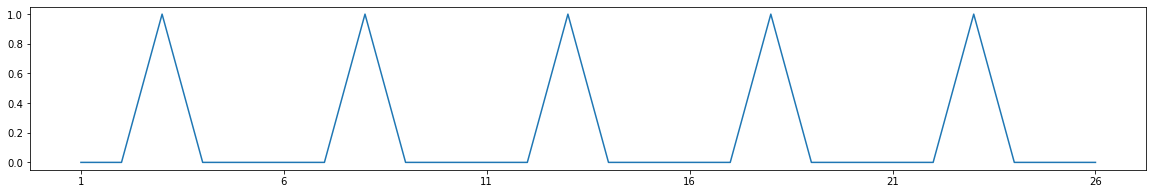

average func duration:  5


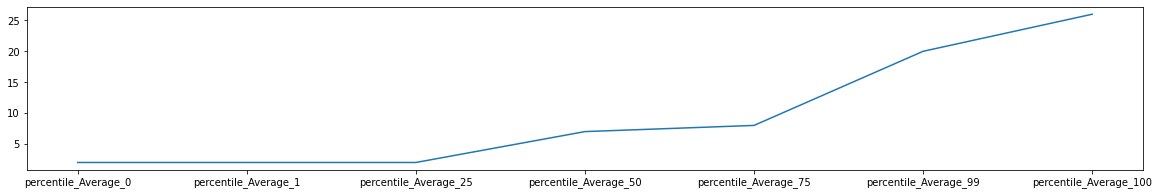

average app memory:  127


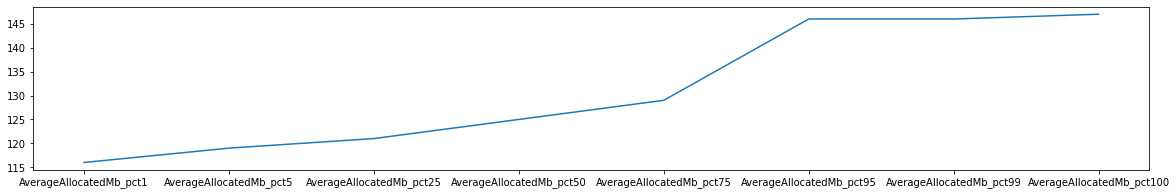

In [3]:
def check_function_duration_memory(func_id='8e779b8c790480edd107e1b474548f3a75e3d98cd77832a7539ab208fe970bd0', day='01'):
    f = f'invocations_per_function_md.anon.d{day}.csv'
    funcs = pd.read_csv(data_root+f)
    func = funcs[funcs['HashFunction']==func_id]
    print('func_id: ', func['HashFunction'].values)
    print('app_id: ', func['HashApp'].values)
    app_id = func['HashApp'].values[0]
    print('trigger: ', func['Trigger'].values)
    pattern = func.iloc[0,4:30]
    pattern.plot()
    plt.show()
    
    f_func_duration = f'function_durations_percentiles.anon.d{day}.csv'
    apps = pd.read_csv(data_root+f_func_duration)
    funcs_dur = pd.read_csv(data_root+f_func_duration)
    func_dur = funcs_dur[funcs_dur['HashFunction']==func_id]
    print('average func duration: ',func_dur['Average'].values[0])
    pattern_dur = func_dur.iloc[0,7:]
    pattern_dur.plot()
    plt.show()    

    f_app = f'app_memory_percentiles.anon.d{day}.csv'
    apps = pd.read_csv(data_root+f_app)
    app = apps[apps['HashApp']==app_id]
    
    print('average app memory: ', app.iloc[0,3])
    pattern = app.iloc[0,4:]
    pattern.plot()
    plt.show()

    return

check_function_duration_memory(func_id='b83b1aab2caeed6ea8fb204f414856fb2a8dd5a88563542b1a952583eeb04ddf',day='01')

In [3]:
# sample_files = files_function[:9]

sample_files = ['invocations_per_function_md.anon.d01.csv']
sample_files

['invocations_per_function_md.anon.d01.csv']

In [4]:
dfs = [pd.read_csv(data_root+f) for f in sample_files]
df = pd.concat(dfs)
# dfs[0].shape, dfs[1].shape, dfs[2].shape, df.shape

In [6]:
df.head(1)["HashFunction"].values

array(['520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96b3d7f85d46209b7872'],
      dtype=object)

In [18]:
myfunc_id

'8e779b8c790480edd107e1b474548f3a75e3d98cd77832a7539ab208fe970bd0'

In [6]:
myfunc = df.iloc[20,:]
myfunc_id = myfunc["HashFunction"]
myapp_id = myfunc["HashApp"]
myfunc, myapp_id

(HashOwner       71ca12c7af70d021e285b51b245942f8432df6463ff9f2...
 HashApp         a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...
 HashFunction    8e779b8c790480edd107e1b474548f3a75e3d98cd77832...
 Trigger                                             orchestration
 1                                                               0
                                       ...                        
 1436                                                            0
 1437                                                            0
 1438                                                            0
 1439                                                            0
 1440                                                            0
 Name: 20, Length: 1444, dtype: object,
 'a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5b3fbb894b8800418f3')

In [13]:
sample_files = ['app_memory_percentiles.anon.d01.csv']
dfs = [pd.read_csv(data_root+f) for f in sample_files]
df = pd.concat(dfs)
df.head(10)

,HashOwner,HashApp,SampleCount,AverageAllocatedMb,AverageAllocatedMb_pct1,AverageAllocatedMb_pct5,AverageAllocatedMb_pct25,AverageAllocatedMb_pct50,AverageAllocatedMb_pct75,AverageAllocatedMb_pct95,AverageAllocatedMb_pct99,AverageAllocatedMb_pct100
0,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,7ca324d9fc836a5d4562811c11ce3719530ee919dd1fb9...,17235,108,108,108,108,109,109,109,110,110
1,dca6b75d51b494146b50f93b0f1a863ce99164942695e8...,cfccc67d83c3c4dc1dd075e77e41232282e4d7a75d2ba9...,536284,322,167,199,251,307,357,532,692,991
2,e564f454ffe6e39c133b43183ca5c1537fec3a55b3a73c...,93db1e4c30e99d1c416ee453dd67504641b88144e23219...,34726,673,175,301,471,679,875,1036,1179,1288
3,15d422b003e198041546b5a1b46aa4d3aaada57de592a8...,e59cebb1c16975c6ee9dd52430c55380dc305ae1fb9171...,17238,95,95,95,96,96,96,96,96,96
4,f5b5e5b8537dd76458e850d7c0dc4057dcd8e0dfa50d36...,fb68374027828434785f3c5ce09fcdc2e44212559643bd...,19927,204,182,185,202,206,211,214,223,292
5,98f3fe1d01789fc2d8ab1dc9cd9a31d51fcbf1936e36a4...,16cc0b0d6a30aa79e0a1f5a2efb3c44e310fa90e1e060c...,90414,150,121,126,135,154,164,178,190,210
6,dca6b75d51b494146b50f93b0f1a863ce99164942695e8...,b624b50103e56934f2c621f7940b97f6475d3831c960a3...,494011,195,109,125,156,204,227,262,286,351
7,7dcdc47a22707448ee6b9fb6e087607d1bcf2856ec77e3...,113726795cbd2c08ebb2d51ccd288949dad31dfda15a3e...,12931,194,144,165,193,200,204,209,214,291
8,05adaa46797bfe5f970486cea2a55eda78fd8c4fbf1021...,9184f8fcb594c85bd1bd5e0a11af287bcfc559c315ed22...,27372,181,93,162,177,185,190,202,218,393
9,6c10326cf10b75d6fd0a586d896d195e1ad7ff52d20bd9...,8ce7938e8939815e83e5a6b8db0eab6ae6e103a1772f8d...,21668,143,117,119,134,144,151,175,189,194


In [14]:
df.shape

(17275, 12)

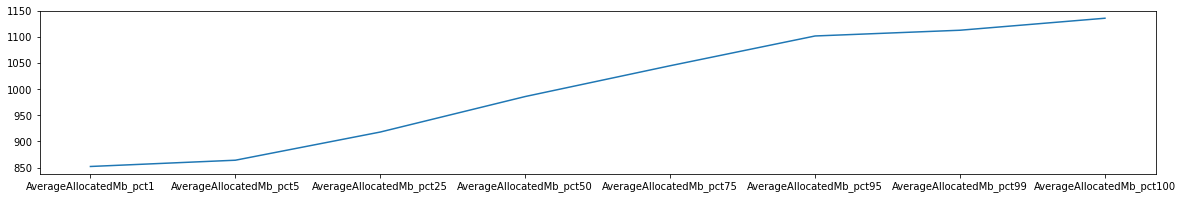

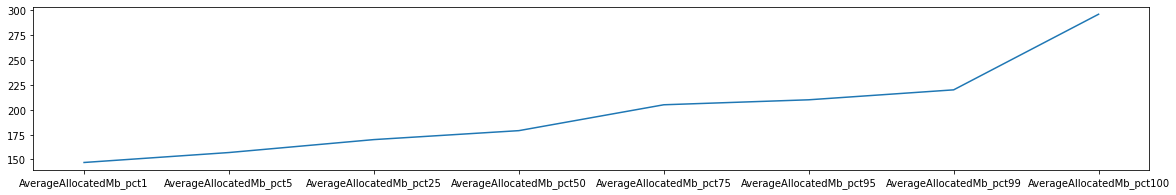

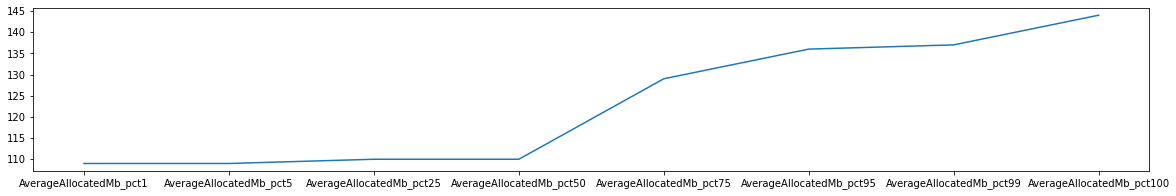

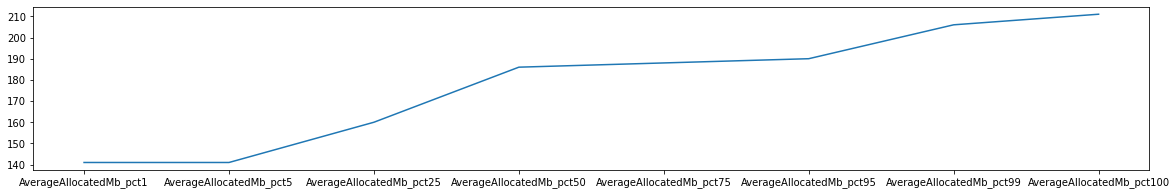

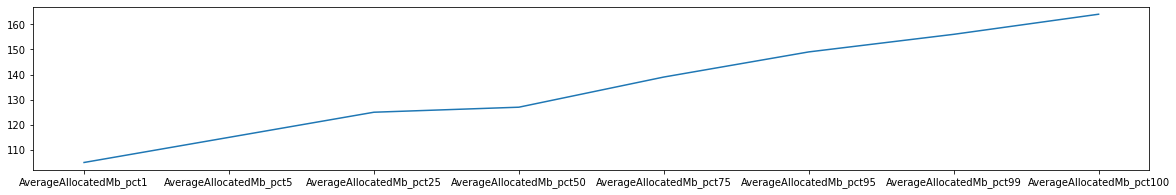

In [15]:
for i in range(5):
    n=random.randint(0,df.shape[0]-1)
    plt.figure()
    df.iloc[n,4:100].plot()
    

In [17]:
df[df['HashApp'] == myapp_id]

,HashOwner,HashApp,SampleCount,AverageAllocatedMb,AverageAllocatedMb_pct1,AverageAllocatedMb_pct5,AverageAllocatedMb_pct25,AverageAllocatedMb_pct50,AverageAllocatedMb_pct75,AverageAllocatedMb_pct95,AverageAllocatedMb_pct99,AverageAllocatedMb_pct100
112,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,21127,127,116,119,121,125,129,146,146,147


In [34]:
df['HashApp'][0]

'7ca324d9fc836a5d4562811c11ce3719530ee919dd1fb91bcaf71942eab8240a'

In [38]:
df.iloc[0,:]

HashOwner                    71ca12c7af70d021e285b51b245942f8432df6463ff9f2...
HashApp                      7ca324d9fc836a5d4562811c11ce3719530ee919dd1fb9...
SampleCount                                                              17235
AverageAllocatedMb                                                         108
AverageAllocatedMb_pct1                                                    108
AverageAllocatedMb_pct5                                                    108
AverageAllocatedMb_pct25                                                   108
AverageAllocatedMb_pct50                                                   109
AverageAllocatedMb_pct75                                                   109
AverageAllocatedMb_pct95                                                   109
AverageAllocatedMb_pct99                                                   110
AverageAllocatedMb_pct100                                                  110
Name: 0, dtype: object

In [50]:
sample_files = files_app[:3]
dfs = [pd.read_csv(data_root+f) for f in sample_files]
df = pd.concat(dfs)
df.head(10)

,HashOwner,HashApp,SampleCount,AverageAllocatedMb,AverageAllocatedMb_pct1,AverageAllocatedMb_pct5,AverageAllocatedMb_pct25,AverageAllocatedMb_pct50,AverageAllocatedMb_pct75,AverageAllocatedMb_pct95,AverageAllocatedMb_pct99,AverageAllocatedMb_pct100
0,432e502f31a50807a4d894301e68a79ff575f3be6521ca...,a4990740c2588808194d784fe0625e3e60f1a588f8ed08...,21379,112,105,106,111,113,116,117,121,125
1,f42d9fe6057c972a789f3eed048b6395ed11278b48109b...,a39f48a85484825ee17ef3c6017a3d0e19fbe033755f8d...,31773,116,99,106,111,115,123,131,139,140
2,43c5a32028b5ea6b2da2533e50f301fca9cf09c25422ad...,777b91f2fc5b28a5408a17bda144bdd0d2e1c749417f60...,18205,123,104,114,119,121,133,134,142,150
3,9c8073e398730c1970a200d071cc00ab1bacee0dc95faa...,b7f4027a889bf944c9f94794d8be6acebc60d32dc86d2f...,19070,183,173,174,182,183,187,187,187,231
4,6b729af68cecdfd09c58680e5b04a7373689f83a8dba07...,07a67894d08c33e0600875702a3c6d1b0fc7359548ee04...,17233,206,203,203,203,208,209,209,209,209
5,98f3fe1d01789fc2d8ab1dc9cd9a31d51fcbf1936e36a4...,3f9fb0df8cc1017c171a7f07afd0fd8ca810f9a6f422a0...,74012,192,119,119,193,203,211,214,217,384
6,dca6b75d51b494146b50f93b0f1a863ce99164942695e8...,cfccc67d83c3c4dc1dd075e77e41232282e4d7a75d2ba9...,564564,335,178,202,256,314,380,558,707,993
7,104f438d72947b49216b97034e44c8f80e90b58c41c08a...,0f2185c1eb68a0ac20e1a6abe55a07b7e55ba413fc3e9c...,104264,108,86,99,104,107,112,119,133,146
8,05adaa46797bfe5f970486cea2a55eda78fd8c4fbf1021...,7f01968a30bb2453cd9a6bfbfd496e8418983cdb6d69cb...,34502,101,88,89,91,102,112,114,116,116
9,05adaa46797bfe5f970486cea2a55eda78fd8c4fbf1021...,ece4e2a5f98824ddf41c6c67dbccb6d959408611892c67...,19580,108,106,107,108,108,108,109,116,117


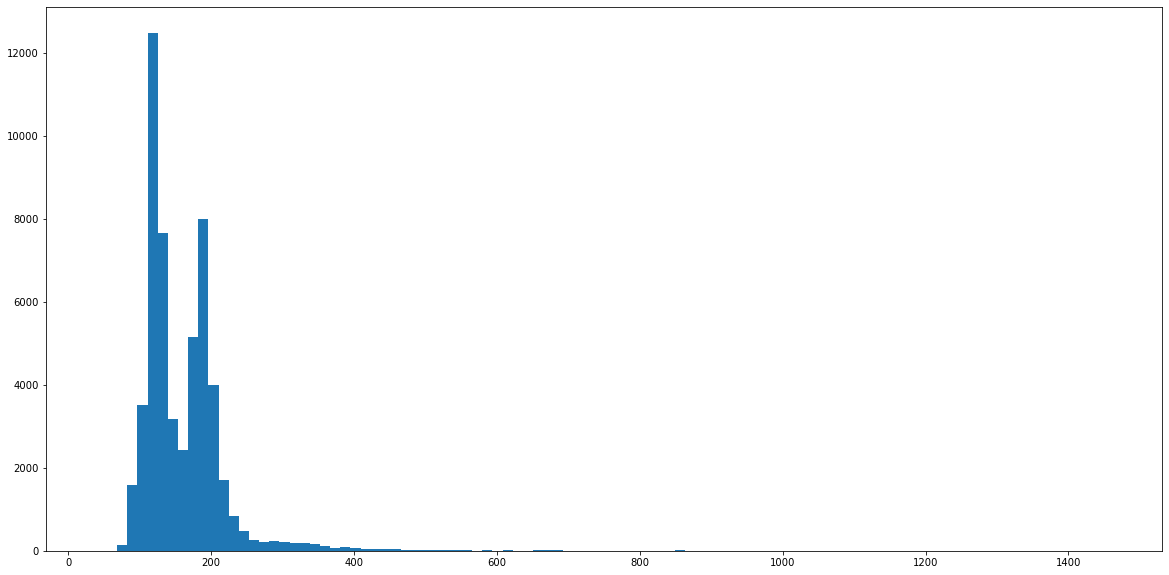

In [54]:
plt.figure(figsize=(20,10))
plt.hist(df['AverageAllocatedMb'],bins=100)
plt.show()